EE 399 Homework 1 - Zack Martin
https://github.com/zimartin

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [17]:
# (i)
# Find minimum error and parameters of A,B,C,D
x = np.arange(0, 31)
y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
              40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

# Define the model function
def f(x, A, B, C, D):
    return A*np.cos(B*x) + C*x + D

# Define the error function
def error(params, x, y):
    A, B, C, D = params
    y_pred = f(x, A, B, C, D)
    return np.sqrt(np.mean((y_pred - y)**2))

# Find the optimal parameters
initial_guess = [0, 0, 0, 0]  # initial guess for A, B, C, D
result = minimize(error, initial_guess, args=(x, y))
A, B, C, D = result.x
min_error = result.fun

# Print the results
print(f"Parameters: A={A}, B={B}, C={C}, D={D}")
print(f"Minimum error: {min_error}")

Parameters: A=2.1717270952398375, B=0.9093254772884792, C=0.7324883536689814, D=31.45277414311617
Minimum error: 1.5927258502839041


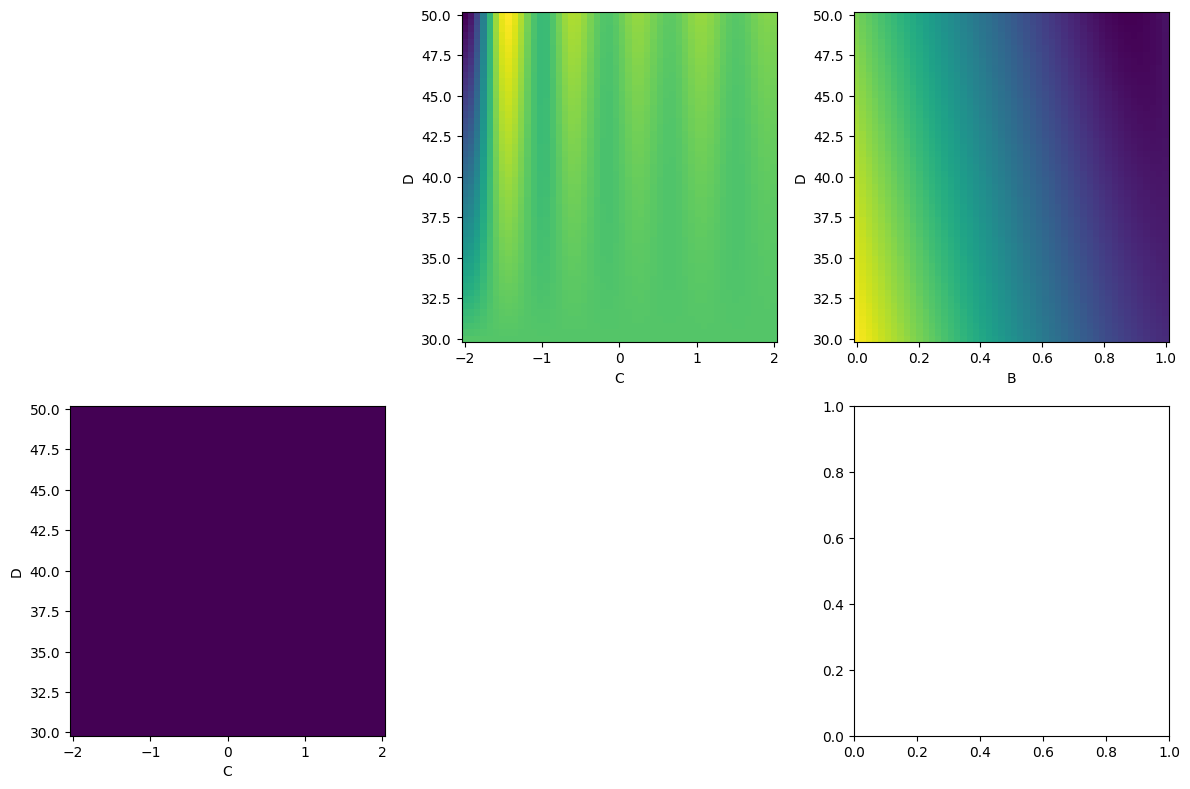

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def model_func(x, A, B, C, D):
    return A*np.cos(B*x) + C*x + D

X = np.arange(0, 31)
Y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
              40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

# Fix two parameters and sweep through the other two
A_values = np.linspace(0, 15, 50)
B_values = np.linspace(0, 1, 50)
C_values = np.linspace(-2, 2, 50)
D_values = np.linspace(30, 50, 50)

losses = np.zeros((4, 4, 50, 50))
params = np.zeros((4, 4, 4))

for i, param1 in enumerate(['A', 'B', 'C', 'D']):
    for j, param2 in enumerate(['A', 'B', 'C', 'D']):
        if i >= j:
            continue
        for k, val1 in enumerate(eval(f"{param1}_values")):
            for l, val2 in enumerate(eval(f"{param2}_values")):
                p = [0, 0, 0, 0]
                p[i] = val1
                p[j] = val2
                params[i, j, :] = p
                error = np.sqrt(np.mean((model_func(X, *p) - Y)**2))
                losses[i, j, k, l] = error

# Plot the results
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i, ax in enumerate(axes.flatten()):
    if i == 5:
        break
    j, k = np.unravel_index(i, (2, 3))
    p = [param for n, param in enumerate(['A', 'B', 'C', 'D']) if n not in [j, k]]
    if len(p) == 2:
        p1, p2 = p
        ax.pcolor(eval(f"{p1}_values"), eval(f"{p2}_values"), losses[j, k], cmap='viridis')
        ax.set_xlabel(p1)
        ax.set_ylabel(p2)
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()
